In [14]:
print(df.duplicated().sum())

0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [16]:
# Data preprocessing
# Check for missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Como o problema que temos é de classificação (Potável/Não Potável) vamos comparar os diferentes atributos em relação a ser potável ou não potável



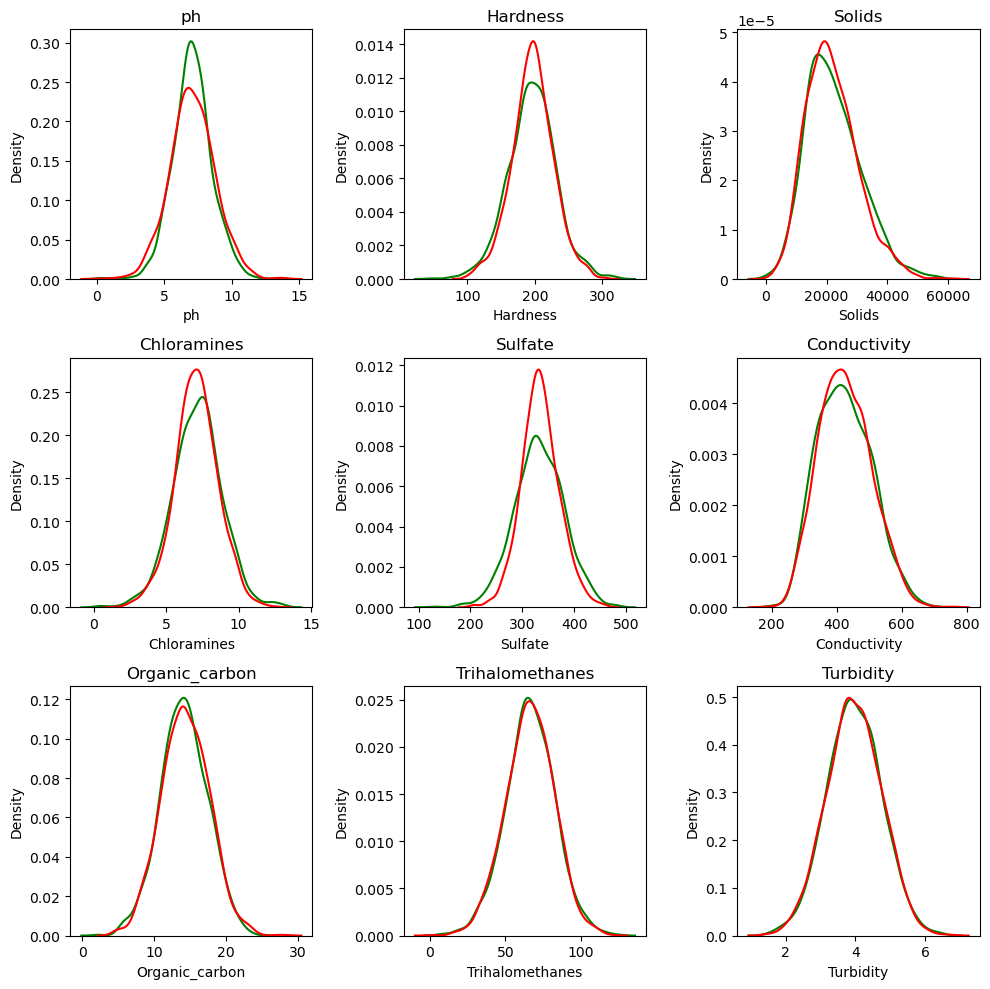

In [17]:
p = df.query('Potability == 1')
non_potable = df.query('Potability == 0')

fig= plt.figure(figsize=(10, 10))

for ax, col in enumerate(df.columns[:-1]): # Não podemos incluir a coluna Potability
    plt.subplot(3, 3, ax+1)
    sns.kdeplot(p[col], color='green')
    sns.kdeplot(non_potable[col], color='red')
    plt.title(col)
    plt.tight_layout()
    
fig.savefig('kdeplot.jpg')

#### Aqui podemos ver que todos os valores se encontram relativamente dentro da mesma distribuição, assim podemos concluir que substituindo os valores inexistentes pela média deles será uma solução sensata

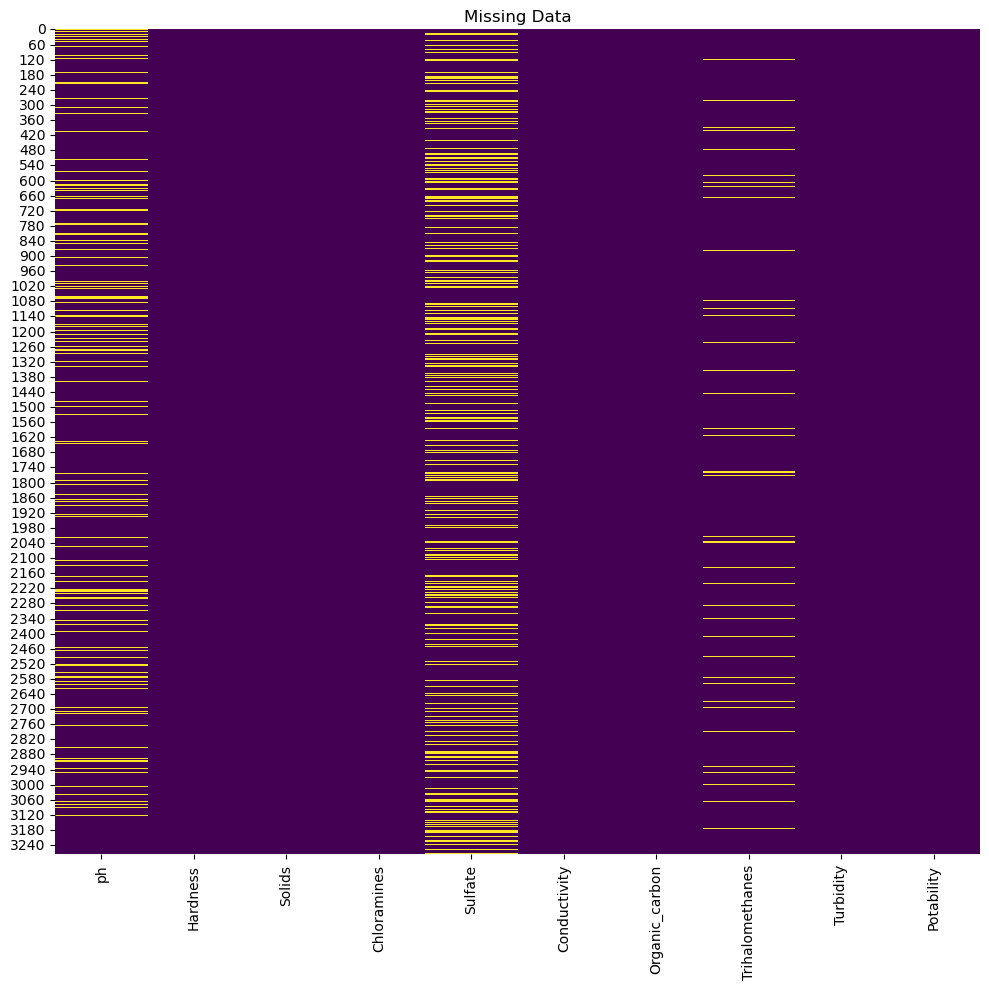

In [18]:
# Heatmap of missing data
fig=plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.tight_layout()
plt.show() 
fig.savefig('missingwater.jpg')

In [20]:
# Replace missing values with mean
df.fillna(df.mean(), inplace=True)

In [21]:
# Check for missing values
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

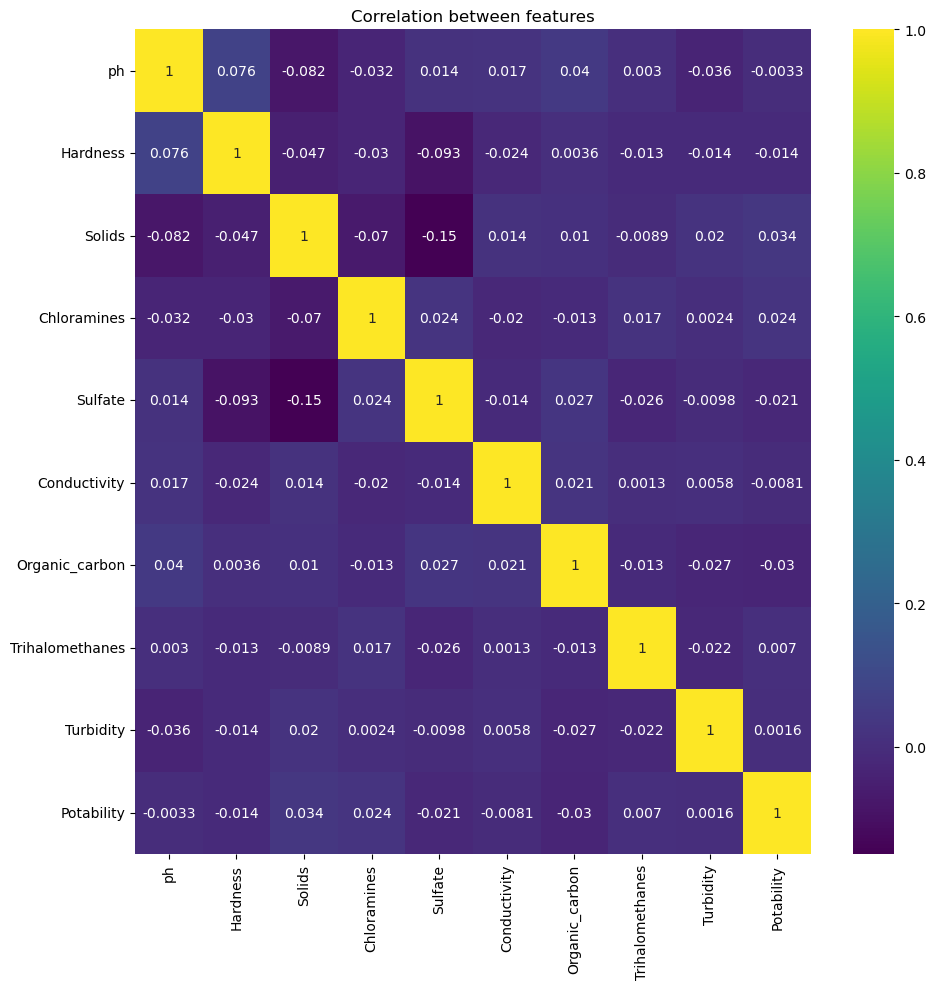

In [22]:
# Check correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation between features')
plt.tight_layout()

### Identificar outliers

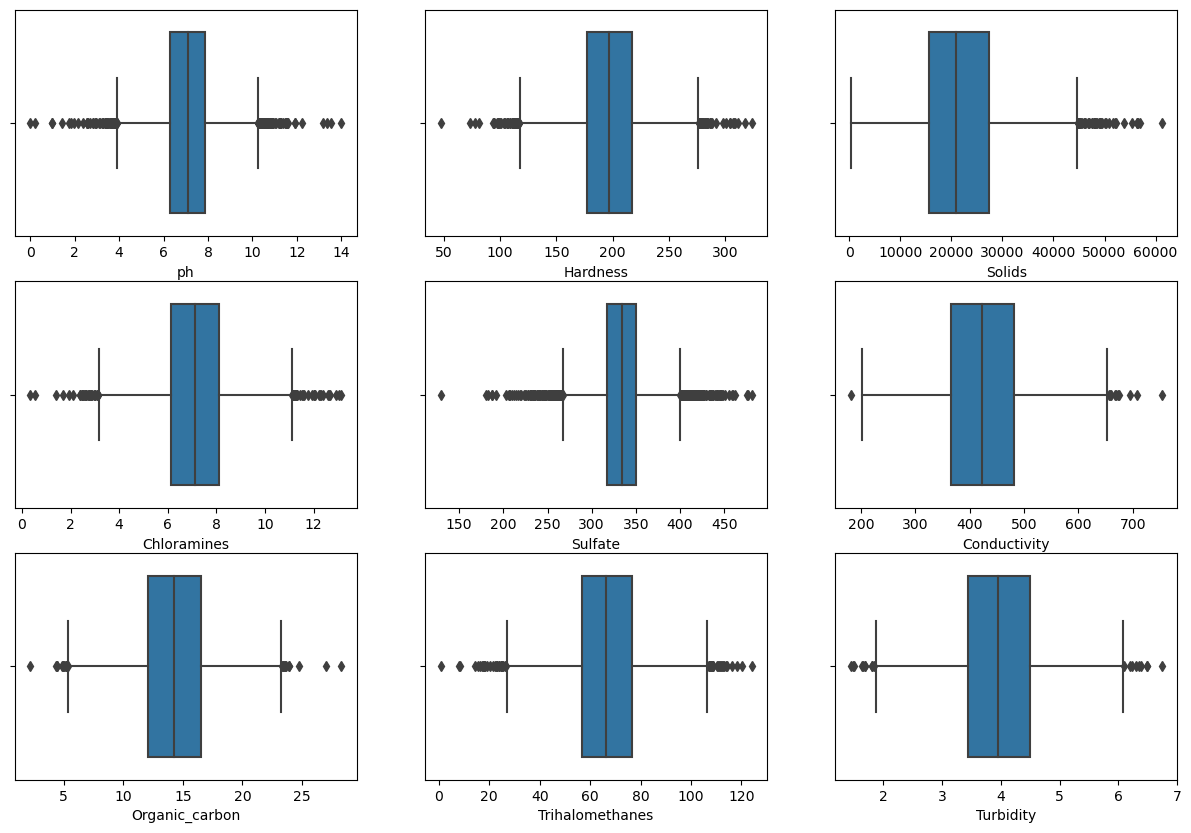

In [23]:
cols = df.drop('Potability', axis=1)
fig = plt.figure(figsize=(15,10))

for (n_plot, col) in enumerate(cols.columns):
    plt.subplot(3, 3, n_plot + 1)
    sns.boxplot(data = df, x = col)

fig.savefig('boxplot.jpg')

In [10]:
for (n_plot, col) in enumerate(df.columns):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

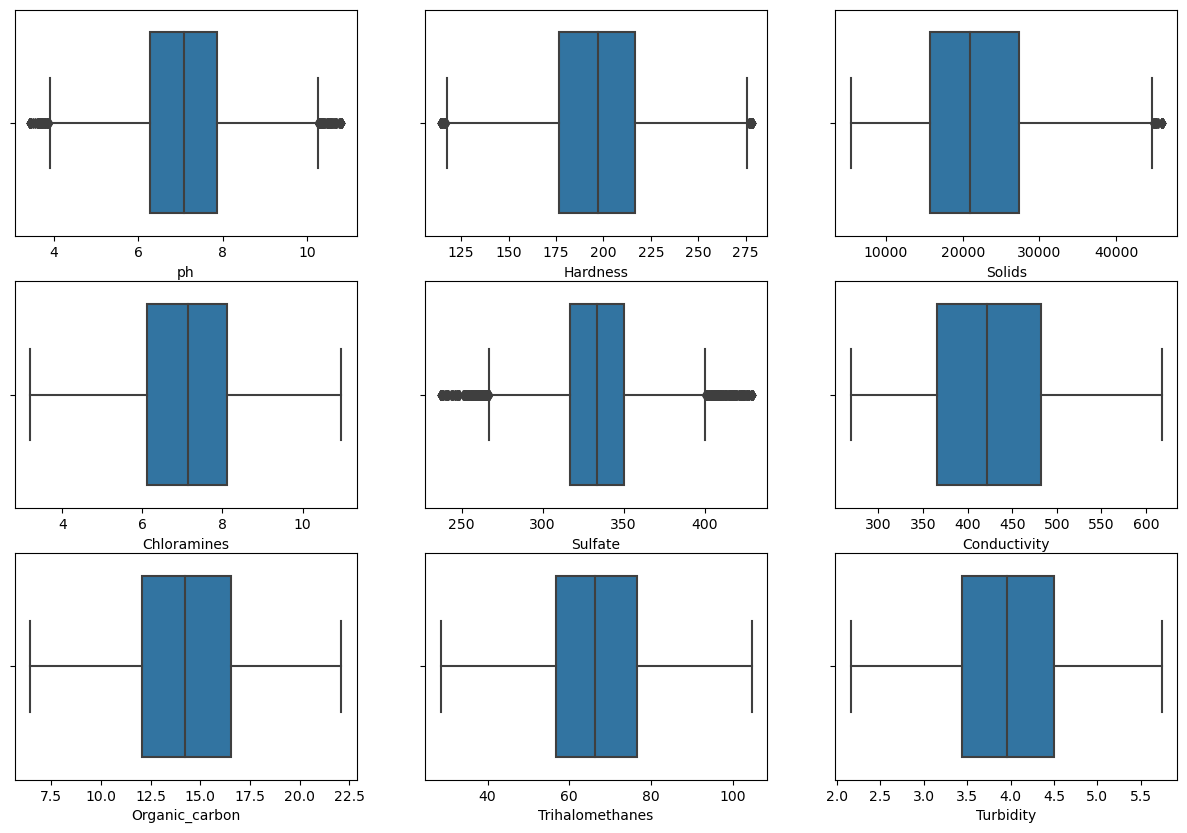

In [11]:
cols = df.drop('Potability', axis=1)
plt.figure(figsize=(15,10))

for (n_plot, col) in enumerate(cols.columns):
    plt.subplot(3, 3, n_plot + 1)
    sns.boxplot(data = df, x = col)

In [12]:
SEED = 42
# Split dataset into train and test
from sklearn.model_selection import train_test_split
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [13]:
# Create models and train
# Support Vector Machine, Decision Tree, Logistic Regression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

models = [('SVC', SVC()), ('Decision Tree', DecisionTreeClassifier(random_state=2023)), ('Logistic Regression', 
        LogisticRegression(random_state=2023)),('Random Forest', RandomForestClassifier(random_state=2023))]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append((name, accuracy_score(y_test, y_pred)))
results


[('SVC', 0.6280487804878049),
 ('Decision Tree', 0.5777439024390244),
 ('Logistic Regression', 0.6280487804878049),
 ('Random Forest', 0.6737804878048781)]

In [14]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Test models with standardized data
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append((name, accuracy_score(y_test, y_pred)))
results


[('SVC', 0.6951219512195121),
 ('Decision Tree', 0.5777439024390244),
 ('Logistic Regression', 0.6280487804878049),
 ('Random Forest', 0.6737804878048781)]

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2023

print("TensorFlow version: ", tf.__version__)

2023-01-06 09:25:32.097445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 09:25:35.052320: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-06 09:25:35.052651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-06 09:25:35.052684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

TensorFlow version:  2.11.0


In [17]:
Y = df['Potability'].to_frame()
Y.columns

Index(['Potability'], dtype='object')

In [18]:
scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(Y)

X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns=X.columns)
Y_scaled = pd.DataFrame(scaler_y.transform(Y[Y.columns]), columns=Y.columns)

In [19]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [20]:
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.493634,0.553355,0.379090,0.527704,0.684656,0.846877,0.251145,0.768467,0.223930
1,0.037117,0.092699,0.325802,0.442057,0.503613,0.928946,0.558113,0.365452,0.653378
2,0.631798,0.671442,0.357349,0.782167,0.503613,0.428437,0.666098,0.498087,0.249850
3,0.661327,0.611239,0.409345,0.625477,0.624047,0.269508,0.766362,0.943946,0.689162
4,0.766539,0.408147,0.309749,0.430640,0.380418,0.370438,0.326508,0.045649,0.534509


In [21]:
Y.head()

,Potability
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [22]:
Y_scaled.head()

,Potability
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [131]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=RANDOM_SEED)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2620, 9)
(2620, 1)
(656, 9)
(656, 1)


In [132]:
def build_model(activation='relu', learning_rate=0.01):
    
    model = Sequential()
    model.add(Dense(10, input_dim=9, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(5, activation=activation))
    model.add(Dense(1, activation='tanh'))

    model.compile(loss = 'binary_crossentropy', optimizer = tf.optimizers.Adam(learning_rate))
    return model

In [133]:
model = build_model()

In [134]:
TUNING_DICT = {'activation' : ['relu', 'tanh'], 'learning_rate' : [0.01, 0.001]}

In [135]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
model = KerasRegressor(build_fn=build_model, epochs=24, batch_size=32)
grid_search = GridSearchCV(estimator = model, param_grid=TUNING_DICT, cv = kf, scoring='neg_mean_absolute_error', refit='True',verbose=1)
grid_search.fit(x_train, y_train, validation_split=0.2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/24


/tmp/ipykernel_4846/3845138510.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, epochs=24, batch_size=32)


53/53 [==============================] - 1s 4ms/step - loss: 0.6883 - val_loss: 0.6414
Epoch 2/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6783 - val_loss: 0.6496
Epoch 3/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6792 - val_loss: 0.6406
Epoch 4/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6781 - val_loss: 0.6455
Epoch 5/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6762 - val_loss: 0.6409
Epoch 6/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6825 - val_loss: 0.6447
Epoch 7/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6790 - val_loss: 0.6439
Epoch 8/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6753 - val_loss: 0.6348
Epoch 9/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6765 - val_loss: 0.6398
Epoch 10/24
53/53 [==============================] - 0s 2ms/step - loss: 0.6656 - val_loss: 0.6284
Epoch 11/24
53/53 [===========

GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3a81afba30>,
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': [0.01, 0.001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [136]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means= grid_search.cv_results_['mean_test_score']
stds=grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.447274 using {'activation': 'tanh', 'learning_rate': 0.01}
-0.450190 (0.049547) with: {'activation': 'relu', 'learning_rate': 0.01}
-0.478897 (0.032772) with: {'activation': 'relu', 'learning_rate': 0.001}
-0.447274 (0.024065) with: {'activation': 'tanh', 'learning_rate': 0.01}
-0.523150 (0.100202) with: {'activation': 'tanh', 'learning_rate': 0.001}


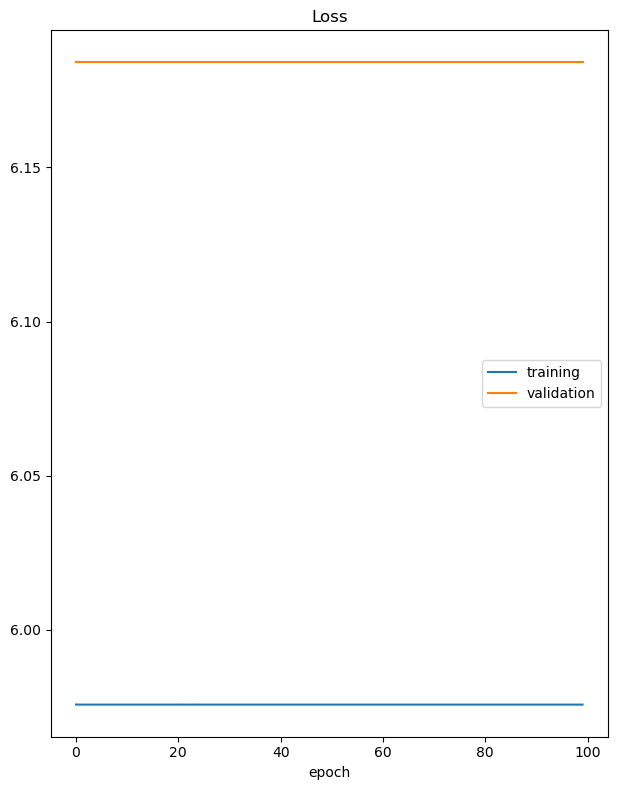

Loss
	training         	 (min:    5.976, max:    5.976, cur:    5.976)
	validation       	 (min:    6.184, max:    6.184, cur:    6.184)
21/21 [==============================] - 0s 857us/step


In [137]:
from livelossplot import PlotLossesKerasTF
best_mlp_model = grid_search.best_estimator_
best_mlp_model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[PlotLossesKerasTF()], verbose=1)
predictions = best_mlp_model.predict(x_test)

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.80      0.68       393
         1.0       0.39      0.20      0.26       263

    accuracy                           0.56       656
   macro avg       0.50      0.50      0.47       656
weighted avg       0.52      0.56      0.51       656



Com isto concluimos que modelo que mais se adequa é o SVC

In [26]:
# Hyperparameter tuning
# Random Forest
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': np.arange(10, 1000, 50),
                'max_depth': [None, 3, 5, 10],
                'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)}
            

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=SEED, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': None}

In [27]:
# GridSearchCV the best parameters
from sklearn.model_selection import GridSearchCV
param_grid = {  
                'n_estimators': [960],
                'max_depth': [None],
                'min_samples_split': [7, 8, 9],
                'min_samples_leaf': [1, 2,3]
            }
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 960}

In [28]:
# Score the model with the best parameters
rf = RandomForestClassifier(n_estimators=960, max_depth=None, min_samples_split=7, min_samples_leaf=2)
rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)
#grid.score(X_test, y_test)
threshold = 0.6
y_pred = (rf.predict_proba(X_test)[:, 1] > threshold).astype('float')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[404   8]
 [202  42]]


In [29]:
from sklearn.metrics import plot_confusion_matrix
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.67      0.98      0.79       412
         1.0       0.84      0.17      0.29       244

    accuracy                           0.68       656
   macro avg       0.75      0.58      0.54       656
weighted avg       0.73      0.68      0.60       656



# A parte em baixo tenta nivelar o desiquilibrio entre Potável e Não Potável ao gerar novas entradas no dataset

In [ ]:
!pip install imbalanced-learn

In [31]:
# Increase the precision of the model
# SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=SEED)
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=SEED)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.5 MB/s eta 0:00:001.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.71875

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72       394
         1.0       0.73      0.72      0.72       406

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



/home/nando/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/nando/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


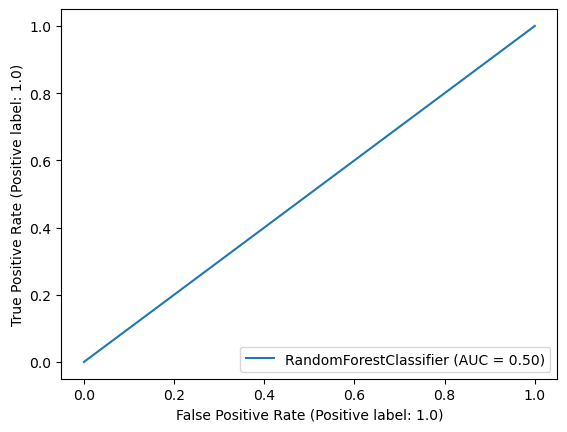

In [32]:
# Predictions
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


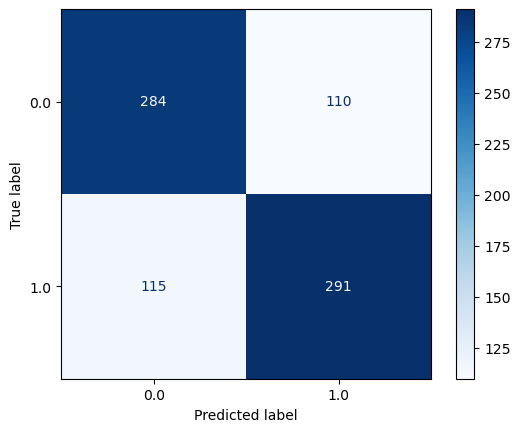

In [33]:
# PLot confusion matrix

plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


/home/nando/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


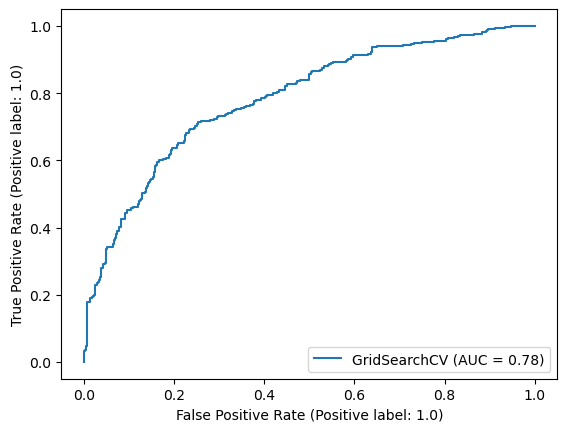

In [34]:
# Plot AUC-ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid, X_test, y_test)
plt.show()